# 선형회귀 데이터 로딩(보스턴 주택가격 데이터)

In [24]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [25]:
data = load_boston()

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

# 모델학습

In [26]:
X = data.data
y = data.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=722)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7454536557439619

In [29]:
# 학습된 가중치와 절편 확인
print("가중치 : ", model.coef_)
print("절편 : ", model.intercept_)

가중치 :  [-1.18313515e-01  5.20521053e-02  1.76355388e-02  4.11554414e+00
 -2.01952839e+01  2.93408084e+00  1.01479948e-02 -1.56497280e+00
  3.16556945e-01 -1.25687293e-02 -1.01868234e+00  6.75071633e-03
 -5.73138231e-01]
절편 :  45.72482696295275


In [30]:
{
'CRIM' :-1.18313515e-01,
'ZN' : 5.20521053e-02,
'INDUS'  : 1.76355388e-02,
'CHAS' : 4.11554414e+00,
'NOX' : -2.01952839e+01,
'RM' : 2.93408084e+00 ,
'AGE' : 1.01479948e-02,
'DIS' : -1.56497280e+00,
'RAD':  3.16556945e-01,
'TAX' : -1.25687293e-02,
'PTRATIO' : -1.01868234e+00,
 'B' : 6.75071633e-03,
'LSTAT' : -5.73138231e-01
}

{'CRIM': -0.118313515,
 'ZN': 0.0520521053,
 'INDUS': 0.0176355388,
 'CHAS': 4.11554414,
 'NOX': -20.1952839,
 'RM': 2.93408084,
 'AGE': 0.0101479948,
 'DIS': -1.5649728,
 'RAD': 0.316556945,
 'TAX': -0.0125687293,
 'PTRATIO': -1.01868234,
 'B': 0.00675071633,
 'LSTAT': -0.573138231}

In [31]:
# 다른 평가지표 사용
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [32]:
pre = model.predict(X_test) # 예측값 생성
print("MAE :", mean_absolute_error(y_test,pre))
print("MSE :", mean_squared_error(y_test,pre))

MAE : 3.028568457448007
MSE : 17.925235768942024


## 선형모델의 학습원리
1. 선형모델은 최적의 가중치 (w)와 절편 (b)를 선택하기위해 MSE(평균제곱오차)를 이용해 각 가설의 적합성을 판단한다.
2. 최적의 가중치(w)와 절편 (b)를 만들기 위해서 2가지 방식을 활용한다.
    - 해석적 방법(Ordinary Least Squares) -> LinearRegression 클래스로 구현됨
    - 경사하강법(Gradient Descent Algorithm) -> SGDRegressor 클래스로 구현됨
        - 초기 가중치로부터 기울기 값을 조금씩 수정해서 찾아가는 방식
        - 기울기가 낮아지는 방향으로 계속 업데이트하는 공식

### 가중치 변화에 다른 MSE 변화 그래프를 그려보자

In [33]:
# 성적데이터 생성
data = pd.DataFrame([[2,20], [4,40], [8,80],[9,90]],
                     index = ['해도', '예호','형','병관'],
                     columns=['공부시간','성적점수'])

In [34]:
data

,공부시간,성적점수
해도,2,20
예호,4,40
형,8,80
병관,9,90


### MSE 함수 생성

In [35]:
def MSE(X,y,w):
    # 예측값 생성
    y_pre = w * X + 0
    # 실제값과 예측값의 차이의 제곱 평균
    error = y- y_pre # 오차
    return (error**2).mean()
    print(y_pre)
    print(error)

In [36]:
MSE(data['공부시간'], data['성적점수'], 10) # 결과값이 0이 나와야함

0.0

### 그래프 그리기

In [37]:
# 변화하는 가중치 생성
weights = np.linspace(1,20,num=20)
weights

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [38]:
mse_list = []
for w in weights :
    mse_list.append(MSE(data['공부시간'], data['성적점수'],w))

mse_list

[3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0]

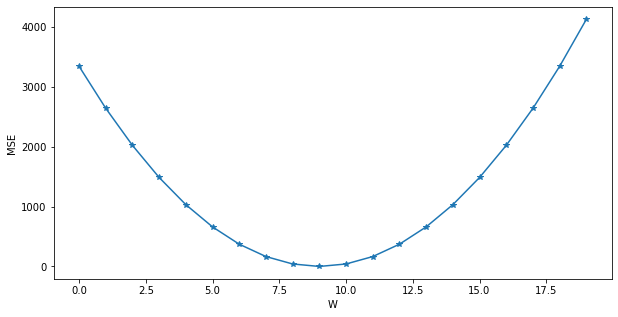

In [39]:
plt.figure(figsize=(10,5))
plt.plot(mse_list, marker = '*')

plt.ylabel("MSE")
plt.xlabel("W")
plt.show()

## 경사하강법으로 구현된 SGDReressor를 사용해보자.

In [40]:
from sklearn.linear_model import SGDRegressor

In [41]:
sgd_model = SGDRegressor(eta0 = 0.01,    # 학습률
                         max_iter = 6000, # 반복횟수(가중치 업데이트 횟수)
                         epsilon = 0.001, # 최소 오차 기준값
                         n_iter_no_change=15, # 업데이트시 오차가 변경되지 않아도 계속 
                                              # 도전하도로 허용하는 횟수
                         verbose=1                     
                        ) 

In [42]:
data[['공부시간']],data['성적점수']

(    공부시간
 해도     2
 예호     4
 형      8
 병관     9,
 해도    20
 예호    40
 형     80
 병관    90
 Name: 성적점수, dtype: int64)

In [43]:
sgd_model.fit(data[['공부시간']],data['성적점수'])

-- Epoch 1
Norm: 8.75, NNZs: 1, Bias: 1.132357, T: 4, Avg. loss: 917.002330
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.57, NNZs: 1, Bias: 1.230487, T: 8, Avg. loss: 14.708294
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.75, NNZs: 1, Bias: 1.252543, T: 12, Avg. loss: 1.014960
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.80, NNZs: 1, Bias: 1.253804, T: 16, Avg. loss: 0.253832
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.82, NNZs: 1, Bias: 1.250909, T: 20, Avg. loss: 0.182778
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.83, NNZs: 1, Bias: 1.248122, T: 24, Avg. loss: 0.166637
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.83, NNZs: 1, Bias: 1.243458, T: 28, Avg. loss: 0.164936
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.83, NNZs: 1, Bias: 1.239048, T: 32, Avg. loss: 0.162730
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.84, NNZs: 1, Bias: 1.235769, T: 36, Avg. loss: 0.160573
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(epsilon=0.001, max_iter=6000, n_iter_no_change=15, verbose=1)

In [44]:
print("가중치 :", sgd_model.coef_)
print("절편 : ", sgd_model.intercept_)

가중치 : [9.84584703]
절편 :  [1.11538448]


In [45]:
sgd_model.predict([[7],[5]])

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([70.03631369, 50.34461963])

- 모델 -> cost,loss function -> optimized -> 모델 (1사이클)
- epoch : 1사이클 돌리는거

### 다항 회귀
- 선형 모델의 수식에서 입력특성에 2차항이 포함된 경우
- 고차항이 포함되면 데이터의 특성을 더 fit하게 맞출 수 있어 성능 개선의 여지가 있다.

In [62]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [65]:
X_train,X_test,y_train,y_test = train_test_split(data, boston.target, random_state=726)

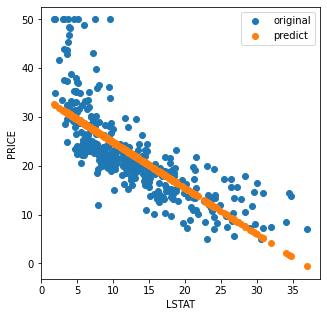

In [72]:
plt.figure(figsize = (5,5)) # 가로,세로 크기
plt.scatter(X_train['LSTAT'],y_train, label = 'original')

# 선형모델 학습
LSTAT_model = LinearRegression()
LSTAT_model.fit(X_train[['LSTAT']],y_train)
# 선형모델의 예측결과 확인
pre = LSTAT_model.predict(X_train[['LSTAT']])
plt.scatter(X_train[['LSTAT']], pre, label= "predict")

plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()

#### 다항회귀 구현하기
- 특성확장을 통해서 다항식을 만들어준다.
- sklearn 의 PolynomialFeatures를 이용한다. # 330P

In [74]:
# 특성 확장!
X_train['LSTAT x LSTAT'] = X_train['LSTAT']**2

In [75]:
# 모델 학습
LSTAT_model2 = LinearRegression()
LSTAT_model2.fit(X_train[['LSTAT','LSTAT x LSTAT']], y_train)
# 모델 예측
pre2 = LSTAT_model2.predict(X_train[['LSTAT','LSTAT x LSTAT']])

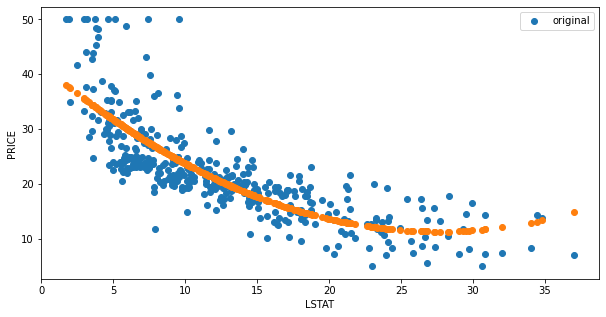

In [77]:
plt.figure(figsize=(10,5))
plt.scatter(X_train['LSTAT'], y_train, label = 'original')
plt.scatter(X_train['LSTAT'], pre2)

plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()